In [42]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

**Dataset**

In [43]:
#loading the dataset
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
#last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [46]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
# checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [48]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [49]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [50]:
# rows, columns
df.shape

(1337, 7)

In [51]:
#rows*columns
df.size

9359

**Exploratory Data Analysis**

Check for outliers

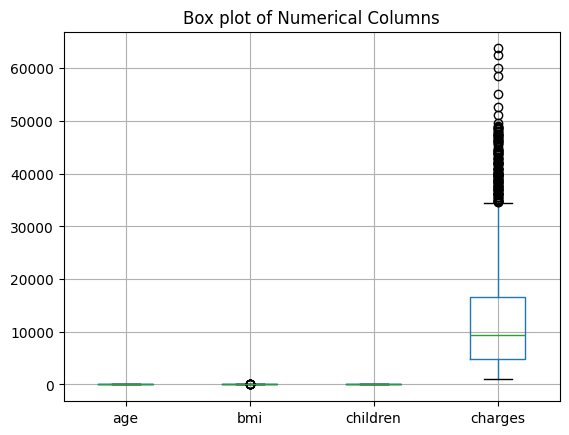

In [52]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [53]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

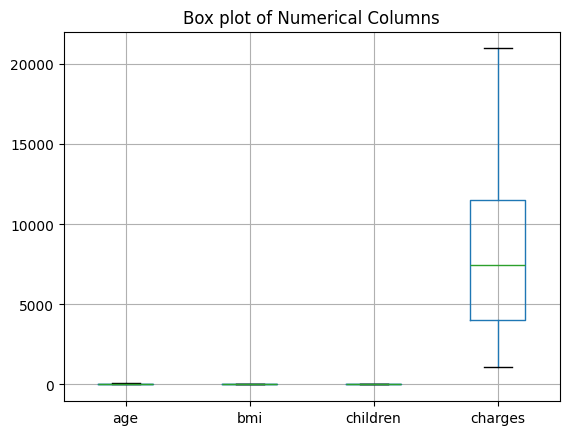

In [54]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [55]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


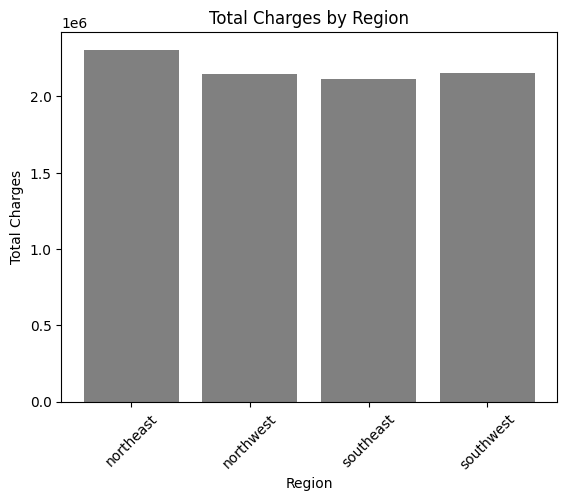

In [56]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

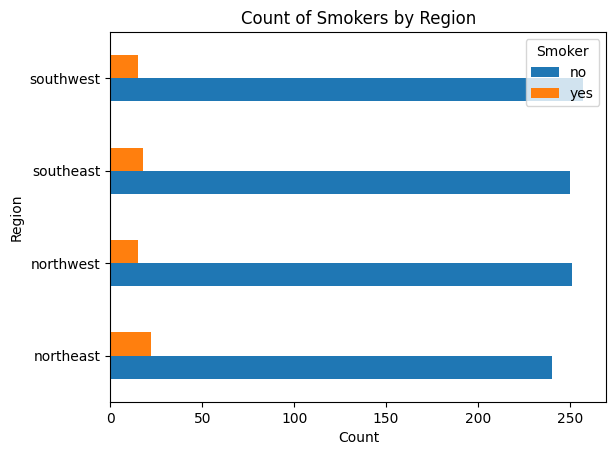

In [57]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

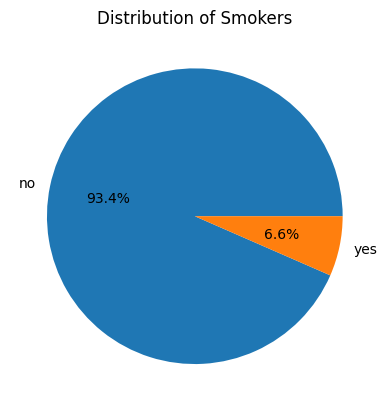

In [58]:
smoker_counts = df_cleaned['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

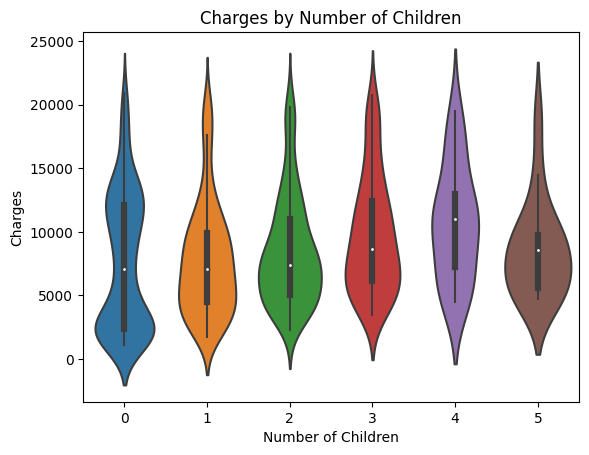

In [59]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

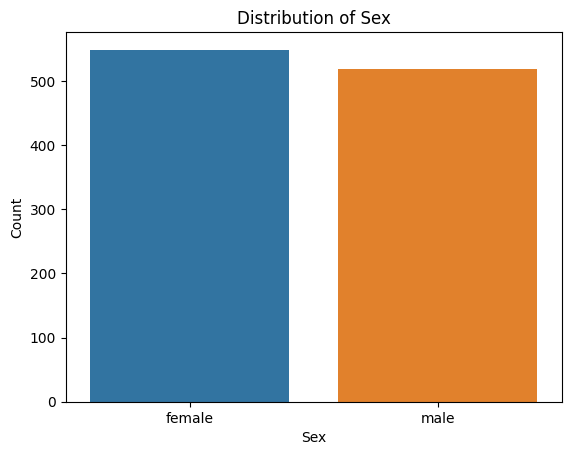

In [60]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

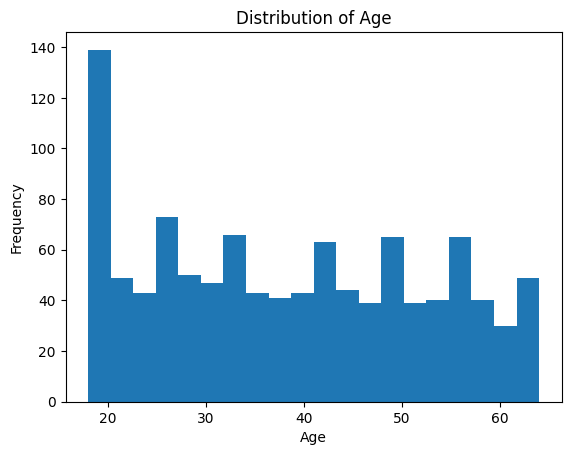

In [61]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

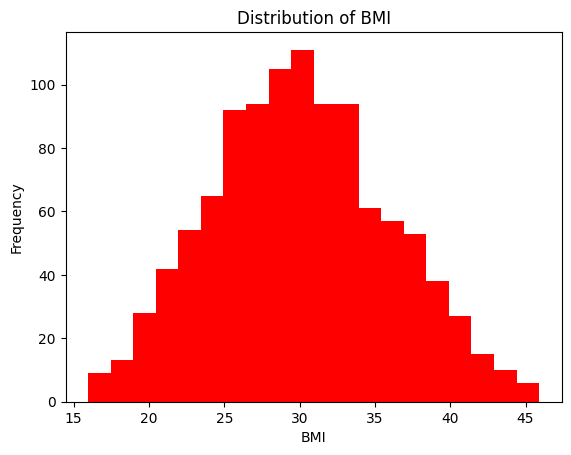

In [62]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

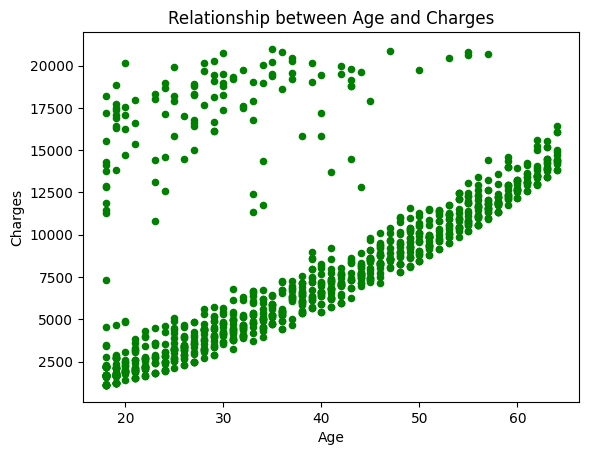

In [63]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

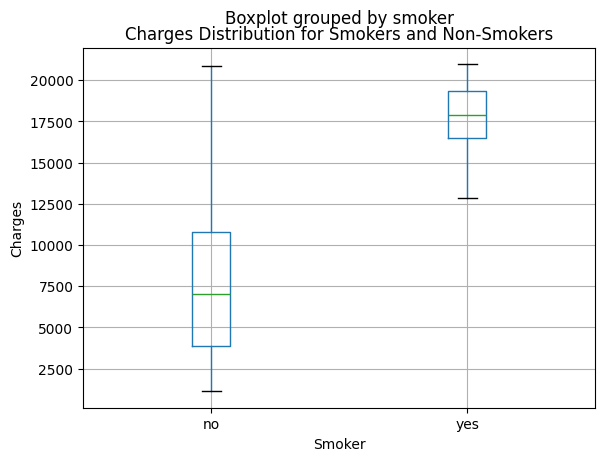

In [64]:
# charges distribution for smokers vs non-smokers using boxplot
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Unsurprisingly, smokers are charged way higher than non-smokers

**Feature Engineering**

Creating new feature such as Age groups

In [65]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_21488\3710811165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
624,59,male,28.785,0,no,northwest,12129.61415,Middle-aged
458,56,male,39.600,0,no,southwest,10601.41200,Middle-aged
631,24,male,29.300,0,no,southwest,1977.81500,Young
1044,55,male,35.245,1,no,northeast,11394.06555,Middle-aged
614,20,female,33.000,0,no,southeast,1880.07000,Young


**Feature encoding** - Handling categorical variables

One-hot encoding for the 'region' column

In [66]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
892,54,male,24.035,0,no,10422.91665,Middle-aged,1,0,0,0
771,53,female,26.700,2,no,11150.78000,Middle-aged,0,0,0,1
505,37,male,30.875,3,no,6796.86325,Adult,0,1,0,0
458,56,male,39.600,0,no,10601.41200,Middle-aged,0,0,0,1
963,46,male,24.795,3,no,9500.57305,Middle-aged,1,0,0,0


Label encoding for the 'smoker', 'sex' column

In [67]:
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
348,36,female,29.920,1,no,5478.03680,Adult,0,0,1,0,0
129,38,male,34.700,2,no,6082.40500,Adult,0,0,0,1,0
578,52,male,30.200,1,no,9724.53000,Middle-aged,0,0,0,1,0
423,25,male,30.590,0,no,2727.39510,Young,1,0,0,0,0
548,25,female,28.595,0,no,3213.62205,Young,1,0,0,0,0


## Simplified Regression Model

In [68]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['charges'])  # Assuming 'charges' is the target variable
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 35478020.68
R-squared Score: 0.81


In [69]:
import numpy as np

class LR1:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Convert to NumPy array with float64 type
        X = X.to_numpy(dtype=np.float64)
        y = y.to_numpy(dtype=np.float64).reshape(-1, 1)  # Ensure y is a column vector

        # Add bias term (column of ones)
        X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Compute OLS solution: W = (X^T * X)^(-1) * X^T * y
        XT = np.transpose(X_bias)
        XTX = np.dot(XT, X_bias)

        try:
            XTX_inv = np.linalg.inv(XTX)
        except np.linalg.LinAlgError:
            print("Matrix is singular, using pseudo-inverse instead.")
            XTX_inv = np.linalg.pinv(XTX)

        XTy = np.dot(XT, y)
        theta = np.dot(XTX_inv, XTy)

        # Separate weights and bias
        self.bias = theta[0]
        self.weights = theta[1:]

    def predict(self, X):
        X = X.to_numpy(dtype=np.float64)  # Convert test data to float64
        X_bias = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

        # Compute predictions step by step
        theta = np.vstack([self.bias, self.weights])
        predictions = np.dot(X_bias, theta)

        return predictions


In [70]:
model1=LR1()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test).flatten()      
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared Score: {r2_1:.2f}")


Mean Squared Error: 35478020.68
R-squared Score: 0.81
